In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


sns.set()

In [2]:
fault_free = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv').iloc[:,1:]
faulty = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv').iloc[:,1:]

In [3]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

fault_free = fault_free.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
faulty = faulty.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [4]:
DF = pd.concat([fault_free, faulty])


In [5]:
DF.head()

,faultNumber,simulationRun,sample,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [6]:
sc = StandardScaler()

fault_free_prescale = DF[DF['faultNumber']==0].iloc[:,3:]
fault_free_scaled = sc.fit_transform(fault_free_prescale)



In [7]:
# We only have ONE cluster, i.e. fault-free data.
# Any point "sufficiently" away from this cluster is faulty.
k = 1

kmeans = KMeans(n_clusters = k).fit(fault_free_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
kmeans.cluster_centers_

array([[-1.72937689e-15,  3.25322476e-14,  3.18427773e-15,
        -4.45581172e-15,  6.63899491e-16, -2.62304845e-14,
         7.65869945e-15, -2.25034029e-14, -1.68148860e-12,
        -3.49231755e-16,  1.49833561e-14,  7.63160291e-15,
         4.59711602e-14, -5.34387468e-15, -2.39815101e-15,
         1.05389975e-13, -1.89326954e-15,  7.07295045e-14,
        -1.49991686e-15,  2.05573505e-14, -6.68159883e-14,
        -4.16378545e-14, -1.29379951e-15,  1.99748307e-15,
         6.75417233e-15, -1.10397453e-14,  7.25556593e-15,
         4.49718041e-15, -1.55184239e-14, -2.59841235e-14,
         4.38146319e-15,  5.56497071e-16, -8.29520630e-15,
         1.82696382e-14,  3.10781578e-15,  2.13815732e-15,
        -5.18572740e-16, -5.16431520e-15,  1.45618895e-15,
         1.26161046e-14,  1.91672075e-14, -5.50084733e-15,
        -2.28021202e-15, -7.40520478e-16, -4.04685704e-15,
         8.19113399e-15, -6.33491393e-15, -3.82368270e-15,
         1.62218594e-15, -9.62205871e-16,  6.79431725e-1

In [9]:
def distanceFromCenter(cluster_center, dataframe):
    pairwise_distance_array = []
    for i in range(len(dataframe)):
        pairwise_distance = pairwise_distances(cluster_center, dataframe[i].reshape(1,-1))
        pairwise_distance_array.append(pairwise_distance)

    return np.array(pairwise_distance_array).reshape(-1)

In [11]:
# LONG RUNTIME ALERT

fault_free_transformed = sc.transform(fault_free_prescale)
Dist_fault_free = distanceFromCenter(cluster_center = kmeans.cluster_centers_, dataframe = fault_free_transformed)

Text(0, 0.5, 'Probability Density')

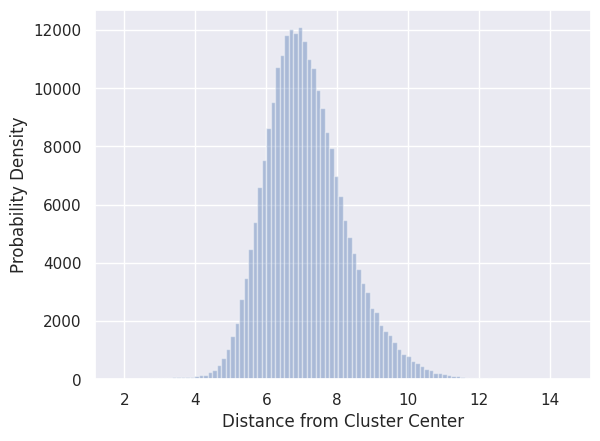

In [ ]:
plt.hist(Dist_fault_free, bins=100, label='Fault-free', alpha=0.4, density=False)
plt.xlabel('Distance from Cluster Center')
plt.ylabel('Probability Density')

In [12]:
mu = np.mean(Dist_fault_free)
std = np.std(Dist_fault_free)

sensitivity = 2

threshold = mu + sensitivity*std

# distance is absolute

threshold

9.423630900039466

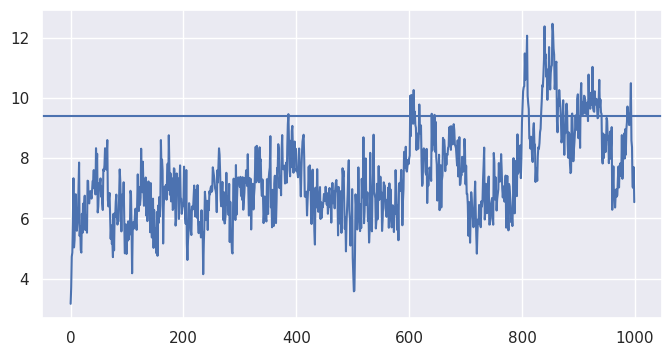

In [ ]:
plt.plot(Dist_fault_free[:1000])
plt.axhline(threshold)

In [14]:
false_df = DF[(DF.faultNumber==0) & (DF.simulationRun.isin(range(46,50)))].iloc[:,3:]
false_data = sc.transform(false_df)
false_dist = distanceFromCenter(cluster_center=kmeans.cluster_centers_, dataframe=false_data)

false_dist

array([4.51176559, 4.01446532, 5.92640891, ..., 8.04225362, 7.51272545,
       7.35145734])

In [17]:
len(np.where(false_dist > threshold))*100/len(false_dist)

0.05

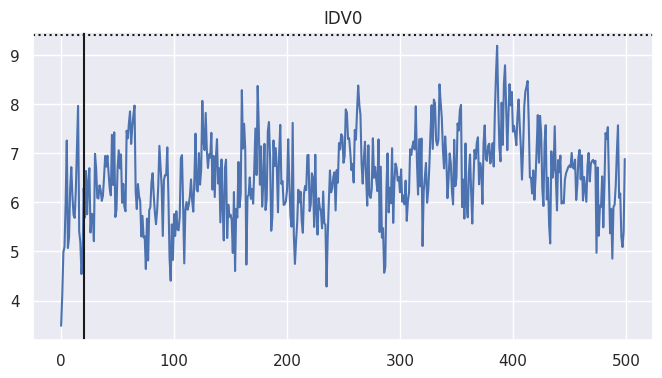

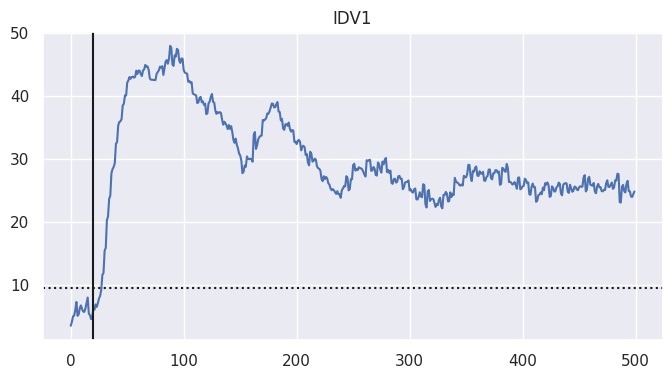

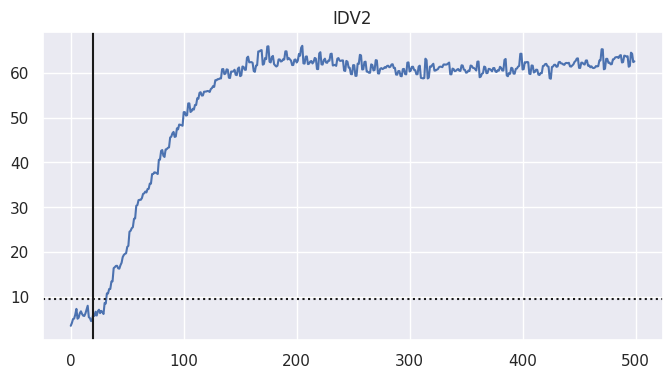

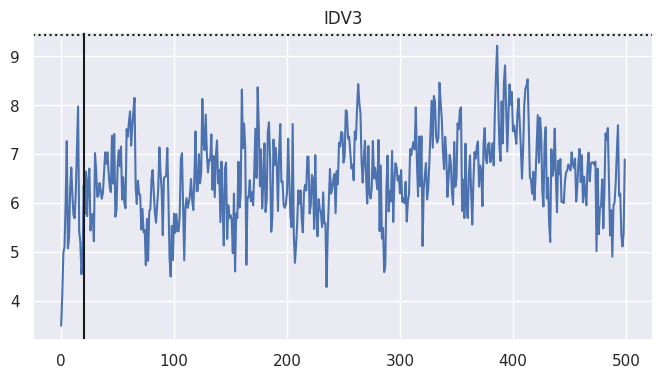

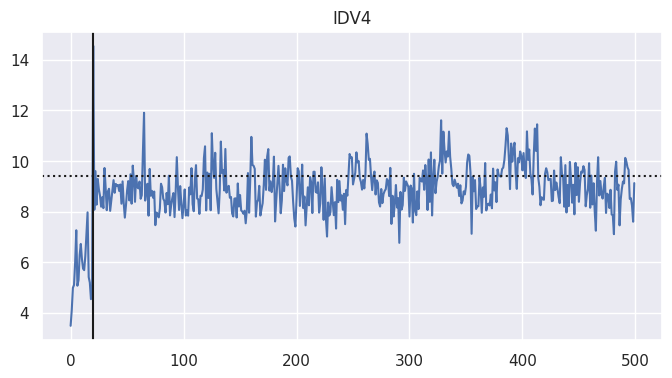

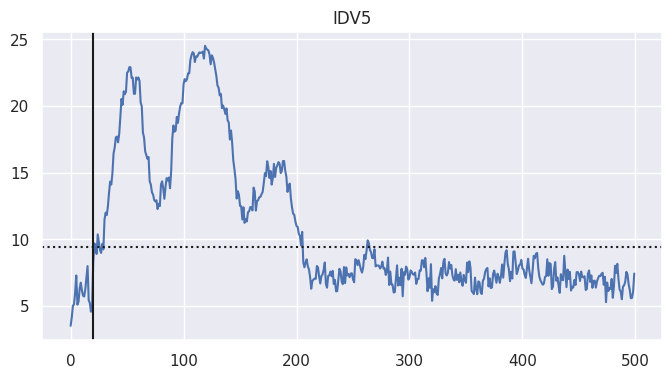

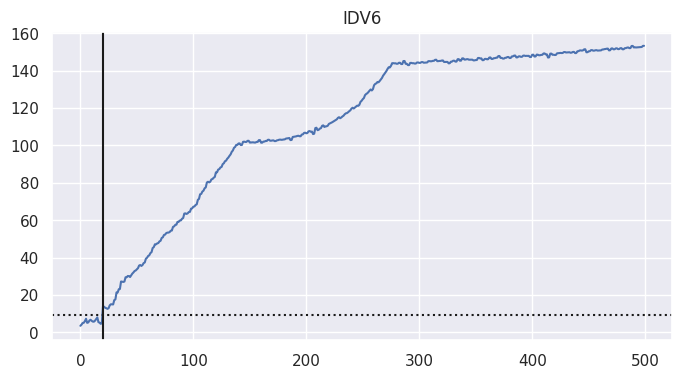

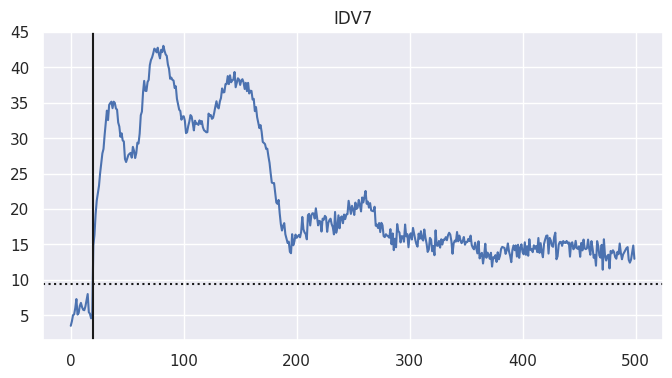

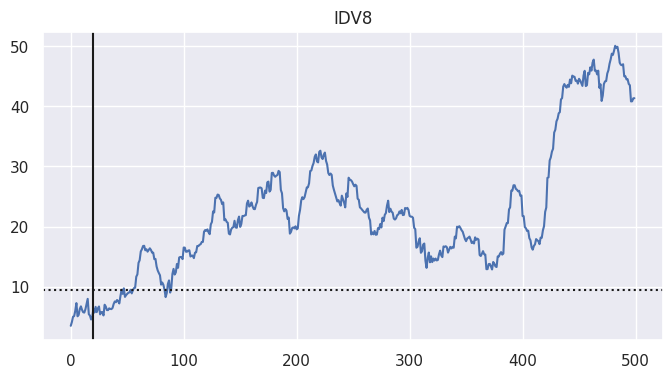

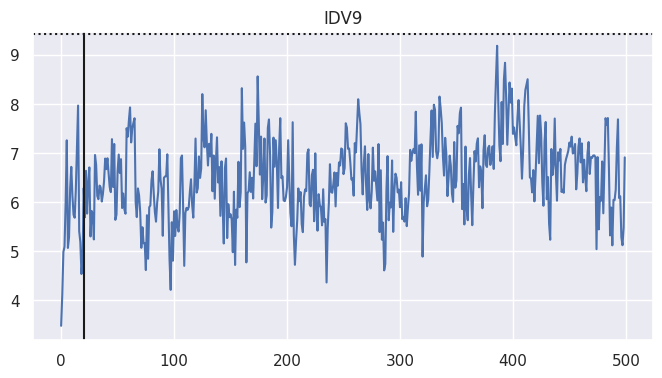

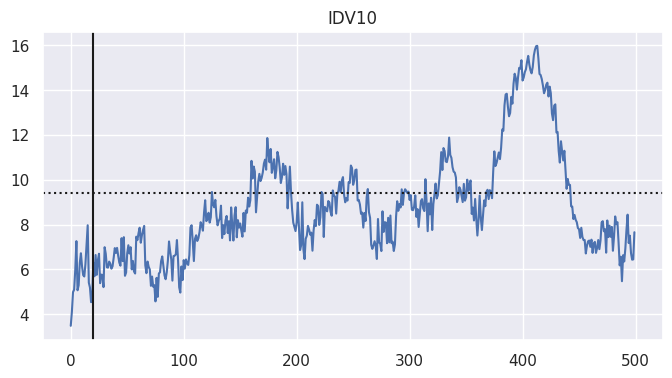

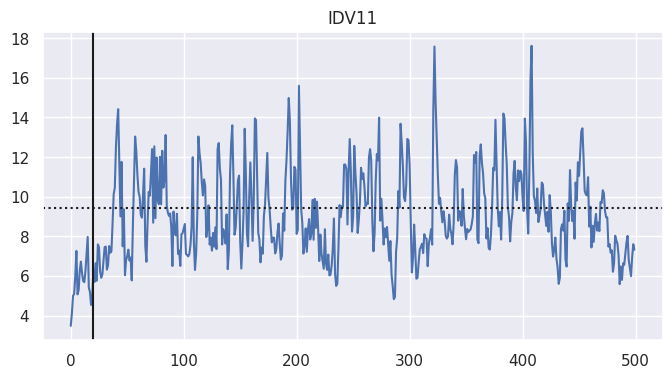

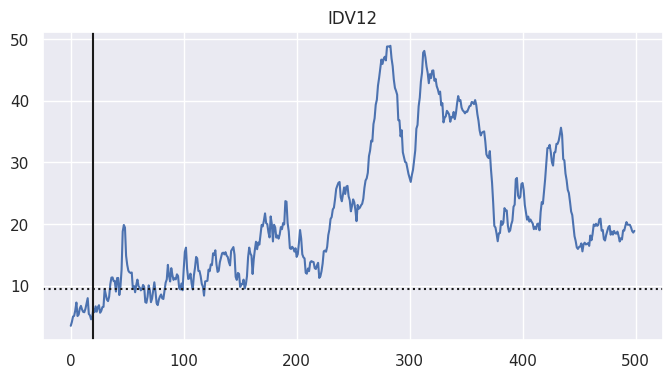

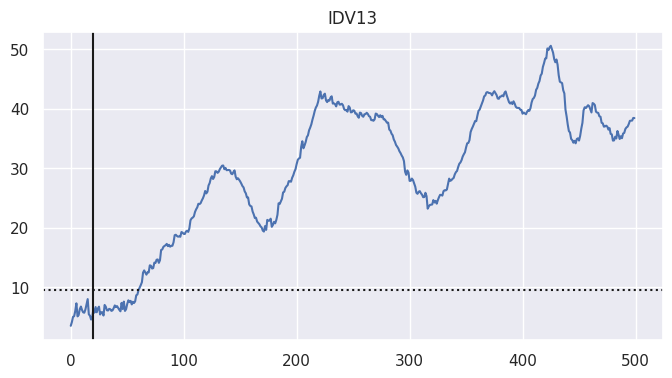

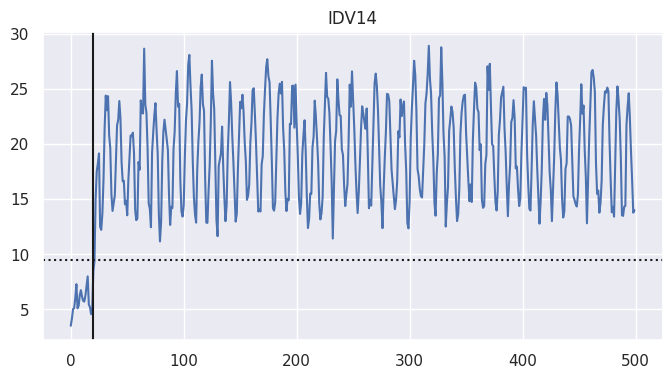

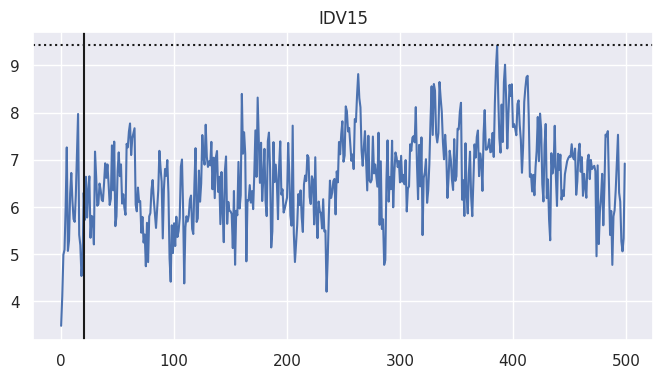

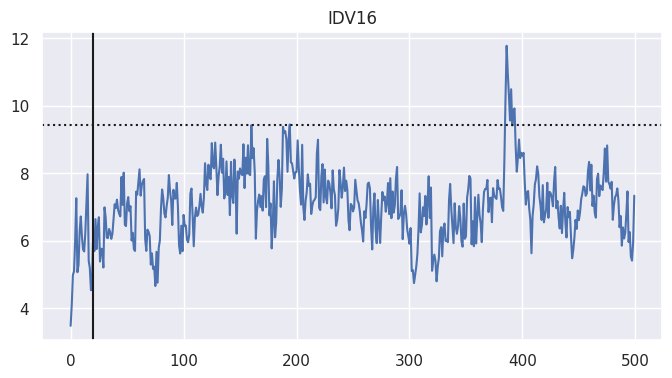

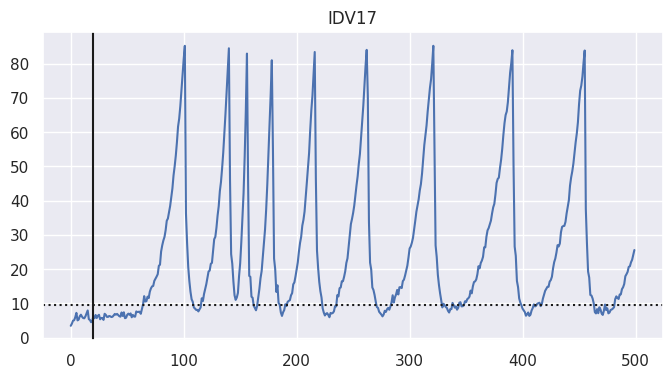

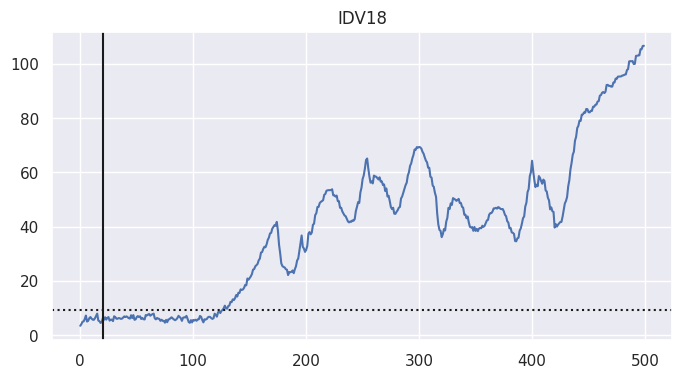

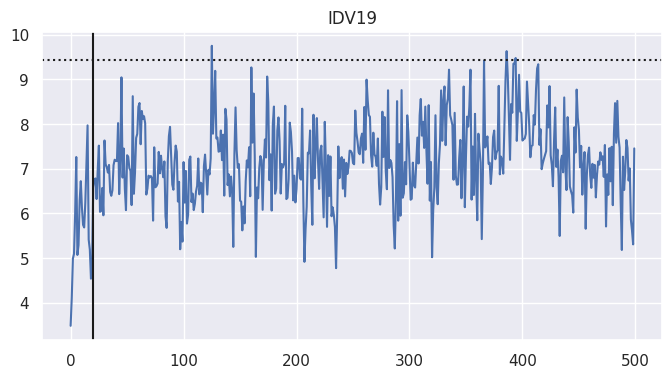

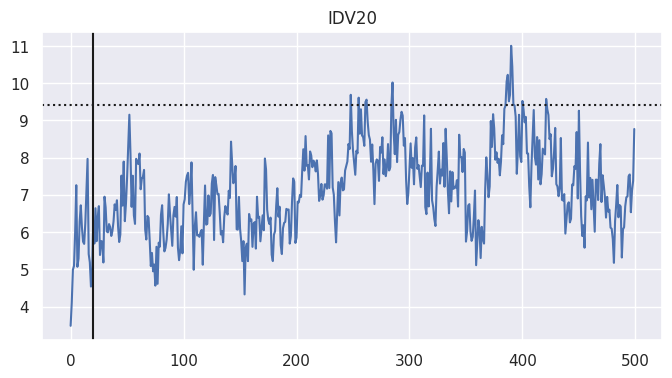

In [ ]:
for fault in range(0,21):

    data_temp = DF[(DF.faultNumber==fault) & (DF.simulationRun==1)].iloc[:,3:]
    data = sc.transform(data_temp)
    Dist_faulty = distanceFromCenter(cluster_center = kmeans.cluster_centers_, dataframe = data)

    plt.rcParams['figure.figsize'] = [8,4]
    plt.plot(Dist_faulty)
    plt.axhline(threshold, c='k', ls='dotted')
    plt.axvline(20, c='k')
    plt.title(f'IDV{fault}')

    plt.show()


In [ ]:
def combined_result(X, threshold):

    result = X > threshold
        # creates a boolean array

    result_float = [float(val) for val in result]
        # converts boolean to float

    return (sum(result_float)/len(result))*100

In [ ]:
fault_counts = {}
    # initialize empty dictionary

for fault in range(1,21):

    data_temp = DF[(DF.faultNumber==fault) & (DF.simulationRun==1)].iloc[:,3:]
    data = sc.transform(data_temp)
    Dist_faulty = distanceFromCenter(cluster_center = kmeans.cluster_centers_, dataframe = data)

    counts = combined_result(Dist_faulty, threshold)
    fault_counts['IDV{}'.format(fault)] = counts

In [ ]:
fault_counts

{'IDV1': 94.39999999999999,
 'IDV2': 93.60000000000001,
 'IDV3': 0.0,
 'IDV4': 26.400000000000002,
 'IDV5': 36.6,
 'IDV6': 96.0,
 'IDV7': 96.0,
 'IDV8': 88.8,
 'IDV9': 0.0,
 'IDV10': 30.4,
 'IDV11': 38.0,
 'IDV12': 88.0,
 'IDV13': 88.0,
 'IDV14': 95.6,
 'IDV15': 0.0,
 'IDV16': 1.7999999999999998,
 'IDV17': 70.19999999999999,
 'IDV18': 74.6,
 'IDV19': 0.6,
 'IDV20': 2.8000000000000003}

In [ ]:
fdr_df = pd.DataFrame.from_dict(fault_counts, orient='index')

In [ ]:
fdr_df.columns = ['kmeans']

In [ ]:
fdr_df

,kmeans
IDV1,94.4
IDV2,93.6
IDV3,0.0
IDV4,26.4
IDV5,36.6
IDV6,96.0
IDV7,96.0
IDV8,88.8
IDV9,0.0
IDV10,30.4


In [ ]:
csv_file_path = '/content/drive/MyDrive/Thesis/comparison/kmeans.csv'
fdr_df.to_csv(csv_file_path, index=False)